# COVID-19 Analysis and Forecasting

## Importing data from the web
#### The first task is to retrieve some data from the Internet. Python has many built-in libraries that were developed over the years to do exactly that (e.g. urllib, urllib2, urllib3, requests).<br>
#### We will get the data from `ourworldindata.org` as the data is regularly updated here.

In [1]:
import requests

In [2]:
req = requests.get('https://ourworldindata.org/coronavirus-source-data')

We can use `dir` to list all the properties of an object.

In [3]:
dir(req)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

The next step is to assign the value of the `text` property of this `Request` object to a variable.

In [67]:
page = req.text
page

'<!doctype html><html><head><meta name="viewport" content="width=device-width, initial-scale=1"/><title>Coronavirus Source Data - Our World in Data</title><meta name="description" content="Our complete COVID-19 dataset is a collection of the COVID-19 data maintained by Our World in Data. It is updated daily and includes data on confirmed cases, deaths, and testing."/><link rel="canonical" href="https://ourworldindata.org/coronavirus-source-data"/><link rel="alternate" type="application/atom+xml" href="/atom.xml"/><link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png"/><meta property="fb:app_id" content="1149943818390250"/><meta property="og:url" content="https://ourworldindata.org/coronavirus-source-data"/><meta property="og:title" content="Coronavirus Source Data"/><meta property="og:description" content="Our complete COVID-19 dataset is a collection of the COVID-19 data maintained by Our World in Data. It is updated daily and includes data on confirmed cases, death

### Importing BeautifulSoup

In [5]:
from bs4 import BeautifulSoup

#### Create a Soup variable to store the parsed contents of the page

In [6]:
soup = BeautifulSoup(page, 'html.parser')

In [7]:
soup.title.get_text

<bound method Tag.get_text of <title>Coronavirus Source Data - Our World in Data</title>>

In [8]:
soup.find_all('a')

[<a href="/">Our World<br/> in Data</a>,
 <a class="topics-button" href="/#entries"><div class="label">Articles <br/><strong>by topic</strong></div><div class="icon"><svg height="6" width="12"><path d="M0,0 L12,0 L6,6 Z" fill="currentColor"></path></svg></div></a>,
 <a data-track-note="header-navigation" href="/blog">Latest</a>,
 <a data-track-note="header-navigation" href="/about">About</a>,
 <a data-track-note="header-navigation" href="/donate">Donate</a>,
 <a data-track-note="header-navigation" href="/charts">All charts</a>,
 <a data-track-note="header-navigation" href="https://sdg-tracker.org">Sustainable Development Goals Tracker</a>,
 <a class="oxford-logo" href="https://www.oxfordmartin.ox.ac.uk/global-development"><img alt="Oxford Martin School logo" src="https://ourworldindata.org/oms-logo.svg"/></a>,
 <a class="gcdl-logo" href="https://global-change-data-lab.org/"><img alt="Global Change Data Lab logo" src="https://ourworldindata.org/gcdl-logo-narrow.png"/></a>,
 <a data-trac

In [9]:
csv_links = []        # creating a list to store the csv links
for link in soup.find_all('a', href=True):
    if 'csv' in link['href']:
        csv_links.append(link['href'])

In [10]:
csv_links

['https://covid.ourworldindata.org/data/owid-covid-data.csv',
 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv',
 'https://covid.ourworldindata.org/data/ecdc/total_deaths.csv',
 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv',
 'https://covid.ourworldindata.org/data/ecdc/new_deaths.csv',
 'https://covid.ourworldindata.org/data/ecdc/full_data.csv',
 'https://covid.ourworldindata.org/data/ecdc/locations.csv',
 'https://covid.ourworldindata.org/data/ecdc/full_data.csv']

#### We need the first link, that contains all the data (total cases, total deaths, new cases etc)

In [11]:
covid_csv_link = csv_links[0]
covid_csv_link

'https://covid.ourworldindata.org/data/owid-covid-data.csv'

### Importing pandas to read the csv from url

In [12]:
import pandas as pd
df = pd.read_csv(covid_csv_link)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,NaN,NaN,International,2020-09-17,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45203,NaN,NaN,International,2020-09-18,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45204,NaN,NaN,International,2020-09-19,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45205,NaN,NaN,International,2020-09-20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45207 entries, 0 to 45206
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44941 non-null  object 
 1   continent                        44675 non-null  object 
 2   location                         45207 non-null  object 
 3   date                             45207 non-null  object 
 4   total_cases                      44604 non-null  float64
 5   new_cases                        44402 non-null  float64
 6   new_cases_smoothed               43620 non-null  float64
 7   total_deaths                     44604 non-null  float64
 8   new_deaths                       44402 non-null  float64
 9   new_deaths_smoothed              43620 non-null  float64
 10  total_cases_per_million          44338 non-null  float64
 11  new_cases_per_million            44338 non-null  float64
 12  new_cases_smoothed

In [14]:
# number of countries and their list
print(df['location'].nunique())
print(df['location'].unique())

212
['Aruba' 'Afghanistan' 'Angola' 'Anguilla' 'Albania' 'Andorra'
 'United Arab Emirates' 'Argentina' 'Armenia' 'Antigua and Barbuda'
 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Bonaire Sint Eustatius and Saba' 'Burkina Faso' 'Bangladesh' 'Bulgaria'
 'Bahrain' 'Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Chile' 'China'
 "Cote d'Ivoire" 'Cameroon' 'Democratic Republic of Congo' 'Congo'
 'Colombia' 'Comoros' 'Cape Verde' 'Costa Rica' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt'
 'Eritrea' 'Western Sahara' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji'
 'Falkland Islands' 'France' 'Faeroe Islands' 'Gabon' 'United Kingdom'
 'Georgia' 'Guernsey' 'Ghana' 'Gibraltar' 'Guinea' 'Gambia'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grena

In [15]:
df['location'].value_counts()

New Zealand       266
Iraq              266
Taiwan            266
Iran              266
Malaysia          266
                 ... 
Western Sahara    149
Tajikistan        144
Comoros           143
Lesotho           130
Hong Kong          16
Name: location, Length: 212, dtype: int64

### Checking the worst affected countries<br>
### We will check both `total deaths` and `total deaths per million`. The latter gives a better idea, keeping the population of country in account.

### Storing  `total deaths` and `total deaths per million` in dictionaries.

In [16]:
countries = df['location'].values

In [17]:
country_wise_total_deaths = {}
country_wise_deaths_per_million = {}
for country in countries:
    data_temp = df[df['location'] == country]
    country_wise_total_deaths[country] = data_temp['total_deaths'].max()
    country_wise_deaths_per_million[country] = data_temp['total_deaths_per_million'].max()

In [18]:
# removing world from the dictionaries
country_wise_total_deaths.pop('World', None)
country_wise_deaths_per_million.pop('World', None)

123.33200000000001

In [19]:
# taking top 25 countries based on death
from collections import Counter
k1 = Counter(country_wise_total_deaths)
cwtd_25 = k1.most_common(25)

k2 = Counter(country_wise_deaths_per_million)
cwdpm_25 = k2.most_common(25)

## Importing plotting libraries

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# using jupyter themes for dark mode plot
# from jupyterthemes import jtplot
# jtplot.style(theme='onedork', ticks=True, grid=True)

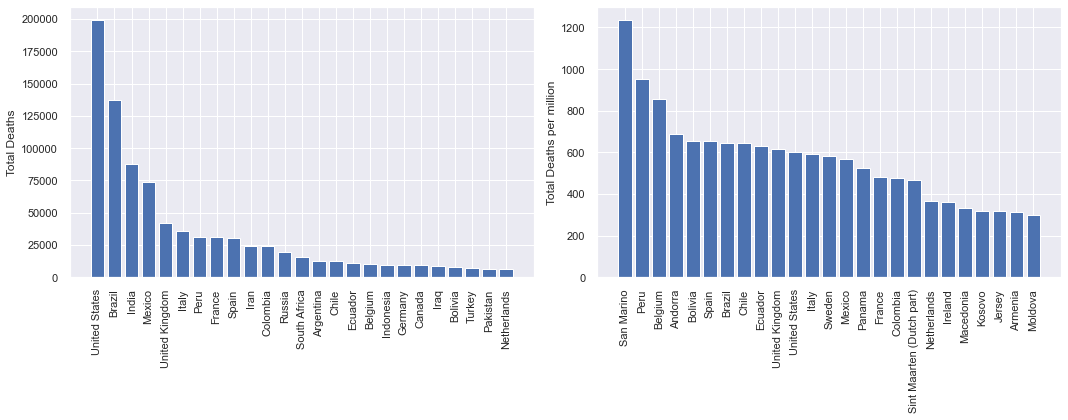

In [69]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axes[0].bar(*zip(*cwtd_25))
axes[0].tick_params(axis='x',labelrotation=90)
axes[0].set_ylabel('Total Deaths')

axes[1].bar(*zip(*cwdpm_25))
axes[1].tick_params(axis='x',labelrotation=90)
axes[1].set_ylabel('Total Deaths per million')

plt.tight_layout()

## This dataframe contains Covid data for all the countries in ascending order based on location i.e., from `Afghanistan` to `Zimbabwe`.
## After that total `World` data is also given.<br>
### We can focus on the world data or on a single country.<br>
### Choosing a country that has gone through both rise and fall in covid cases during the pandemic will give us better insights. Countries like Italy, Spain etc that have gone through phase-3 of this pandemic are more likely to give better understanding of this situation.<br>

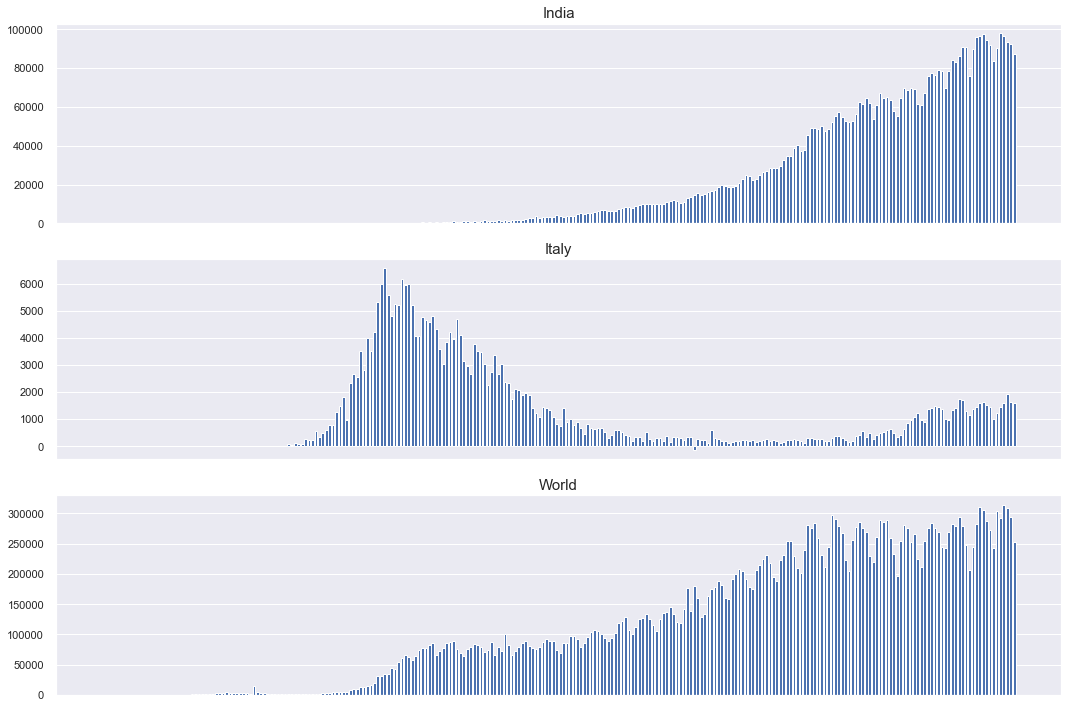

In [75]:
# plotting daily new cases for India, Italy and World
lst = ['India', 'Italy', 'World']
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex= True)
i = 0
for country in lst:
    temp_data = df[df['location']==country]
#     sns.barplot(x = temp_data['date'], y = temp_data['new_cases'], ax = axes[i])
    axes[i].bar(range(temp_data.shape[0]), temp_data['new_cases'])
    axes[i].set_title(country, size=15)
    axes[i].set_xticks([])
    i+=1
plt.tight_layout()

### We will focus on `Italy` in this study as it has seen an increase and decrease in new cases and now the cases are again increasing.

In [76]:
data = df[df['location'] == 'Italy'].reset_index()
data.drop('index', axis=1, inplace=True)

In [77]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ITA,Europe,Italy,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
1,ITA,Europe,Italy,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
2,ITA,Europe,Italy,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
3,ITA,Europe,Italy,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
4,ITA,Europe,Italy,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         266 non-null    object 
 1   continent                        266 non-null    object 
 2   location                         266 non-null    object 
 3   date                             266 non-null    object 
 4   total_cases                      266 non-null    float64
 5   new_cases                        266 non-null    float64
 6   new_cases_smoothed               260 non-null    float64
 7   total_deaths                     266 non-null    float64
 8   new_deaths                       266 non-null    float64
 9   new_deaths_smoothed              260 non-null    float64
 10  total_cases_per_million          266 non-null    float64
 11  new_cases_per_million            266 non-null    float64
 12  new_cases_smoothed_per

### As the dataset is too small and there are too many features, this can cause underfitting of the model. Many of these features are derived from other columns (like total cases, new cases, deaths etc). We will take only the important non null columns for analysis.

In [79]:
data_non_null = data.dropna(axis=1, how='any')
data_non_null

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ITA,Europe,Italy,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
1,ITA,Europe,Italy,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
2,ITA,Europe,Italy,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
3,ITA,Europe,Italy,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
4,ITA,Europe,Italy,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,ITA,Europe,Italy,2020-09-17,291442.0,1452.0,35645.0,12.0,4820.264,24.015,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
262,ITA,Europe,Italy,2020-09-18,293025.0,1583.0,35658.0,13.0,4846.446,26.182,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
263,ITA,Europe,Italy,2020-09-19,294932.0,1907.0,35668.0,10.0,4877.987,31.541,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
264,ITA,Europe,Italy,2020-09-20,296569.0,1637.0,35692.0,24.0,4905.062,27.075,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88


### The columns of utmost importance like `total_cases`, `new_cases`, `total_deaths`, `new_deaths`, `total_cases_per_million` are still there.

In [80]:
data_non_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    266 non-null    object 
 1   continent                   266 non-null    object 
 2   location                    266 non-null    object 
 3   date                        266 non-null    object 
 4   total_cases                 266 non-null    float64
 5   new_cases                   266 non-null    float64
 6   total_deaths                266 non-null    float64
 7   new_deaths                  266 non-null    float64
 8   total_cases_per_million     266 non-null    float64
 9   new_cases_per_million       266 non-null    float64
 10  total_deaths_per_million    266 non-null    float64
 11  new_deaths_per_million      266 non-null    float64
 12  population                  266 non-null    float64
 13  population_density          266 non

In [81]:
# checking unique values in each column
for col in data_non_null.columns:
    print(col, data_non_null[col].nunique())

iso_code 1
continent 1
location 1
date 266
total_cases 215
new_cases 206
total_deaths 212
new_deaths 130
total_cases_per_million 215
new_cases_per_million 206
total_deaths_per_million 212
new_deaths_per_million 130
population 1
population_density 1
median_age 1
aged_65_older 1
aged_70_older 1
gdp_per_capita 1
extreme_poverty 1
cardiovasc_death_rate 1
diabetes_prevalence 1
female_smokers 1
male_smokers 1
hospital_beds_per_thousand 1
life_expectancy 1
human_development_index 1


We can see that there are columns that have only one unique value per column. These are the column that repreent something that is unique to a particular country (in this case `Italy`) such as `gdp_per_capita`, `human_development_index`.<br>
These columns will be useful when we have to compare two countries or a coutry wrt world data.
These columns will not contribute to our forcast, so we will drop these columns.

In [82]:
unique_val_cols = []
for col in data_non_null.columns:
    if data_non_null[col].nunique() == 1:
        unique_val_cols.append(col)

In [83]:
unique_val_cols

['iso_code',
 'continent',
 'location',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [84]:
data_italy = data_non_null.drop(unique_val_cols, axis = 1)

In [85]:
data_italy

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000
1,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000
2,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000
3,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000
4,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
261,2020-09-17,291442.0,1452.0,35645.0,12.0,4820.264,24.015,589.546,0.198
262,2020-09-18,293025.0,1583.0,35658.0,13.0,4846.446,26.182,589.761,0.215
263,2020-09-19,294932.0,1907.0,35668.0,10.0,4877.987,31.541,589.926,0.165
264,2020-09-20,296569.0,1637.0,35692.0,24.0,4905.062,27.075,590.323,0.397


## Creating Checkpoint

In [86]:
data_final = data_italy

In [87]:
data_final.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      266 non-null    object 
 1   total_cases               266 non-null    float64
 2   new_cases                 266 non-null    float64
 3   total_deaths              266 non-null    float64
 4   new_deaths                266 non-null    float64
 5   total_cases_per_million   266 non-null    float64
 6   new_cases_per_million     266 non-null    float64
 7   total_deaths_per_million  266 non-null    float64
 8   new_deaths_per_million    266 non-null    float64
dtypes: float64(8), object(1)
memory usage: 18.8+ KB


In [89]:
# saving dates in a variable before converting date column to datetime dtype
# ploting will be easier with this
dates = data_final['date'].tolist()
data_final['date'] = pd.to_datetime(data_final['date'], format='%Y-%m-%d')
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      266 non-null    datetime64[ns]
 1   total_cases               266 non-null    float64       
 2   new_cases                 266 non-null    float64       
 3   total_deaths              266 non-null    float64       
 4   new_deaths                266 non-null    float64       
 5   total_cases_per_million   266 non-null    float64       
 6   new_cases_per_million     266 non-null    float64       
 7   total_deaths_per_million  266 non-null    float64       
 8   new_deaths_per_million    266 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 18.8 KB


In [90]:
data_final.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,155377.902256,1120.887218,21260.105263,134.236842,2569.851259,18.538756,351.628556,2.220177
std,110060.251434,1504.944603,15423.103239,221.741325,1820.326183,24.890836,255.088280,3.667471
min,0.000000,-148.000000,0.000000,-31.000000,0.000000,-2.448000,0.000000,-0.513000
25%,4052.500000,159.750000,160.250000,4.000000,67.025750,2.642250,2.650500,0.066000
50%,219442.000000,399.000000,30649.500000,14.000000,3629.430500,6.599000,506.923000,0.232000
75%,243678.500000,1450.000000,35012.000000,164.250000,4030.287000,23.982000,579.076250,2.716500
max,298156.000000,6557.000000,35707.000000,971.000000,4931.310000,108.449000,590.571000,16.060000


## Visualizing the data to get the relation between the features

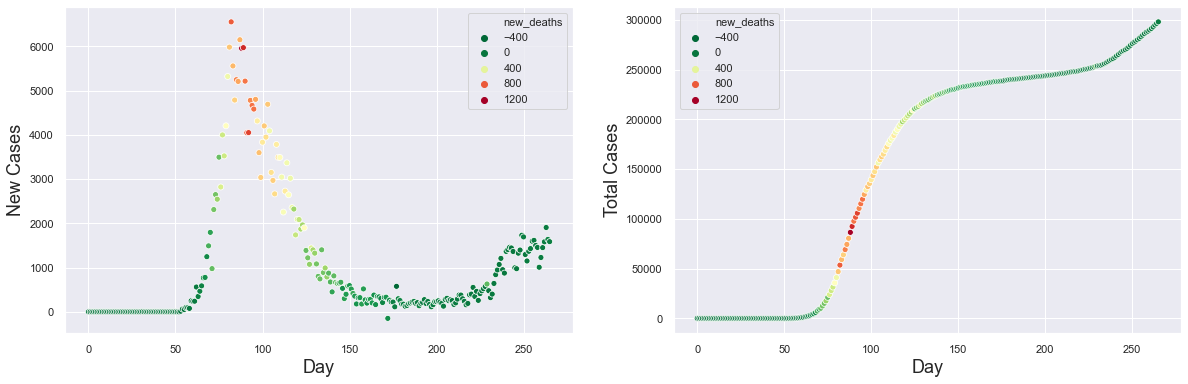

In [94]:
# plotting daily cases each day with hue of new deaths each day
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.scatterplot(x=range(data_final.shape[0]), y='new_cases', hue='new_deaths', data=data_final, palette='RdYlGn_r', ax=axes[0])
sns.scatterplot(x=range(data_final.shape[0]), y='total_cases', hue='new_deaths', data=data_final, palette='RdYlGn_r', ax=axes[1])
axes[0].set_xlabel('Day', size=18)
axes[0].set_ylabel('New Cases', size=18)
axes[1].set_xlabel('Day', size=18)
axes[1].set_ylabel('Total Cases', size=18)
plt.show()

We can see that after day 50, the number of new cases increased tremendously, therfore the total cases curve is very steep.<br>
As obvious, number of people dying per day also incresed with increasing new cases.<br>
(The red color shows high deaths per day while green shows low deaths per day).<br><br>
Then the new cases again starts to decrease after day 90, but its still high. New deaths each day also starts to decrease.<br><br>
After day 150, we can see a stable condition where new cases and new deaths are very low.<br><br>
But after day 220, there is a sudden increase in cases again, but the deaths per day seems to be controlled this time.

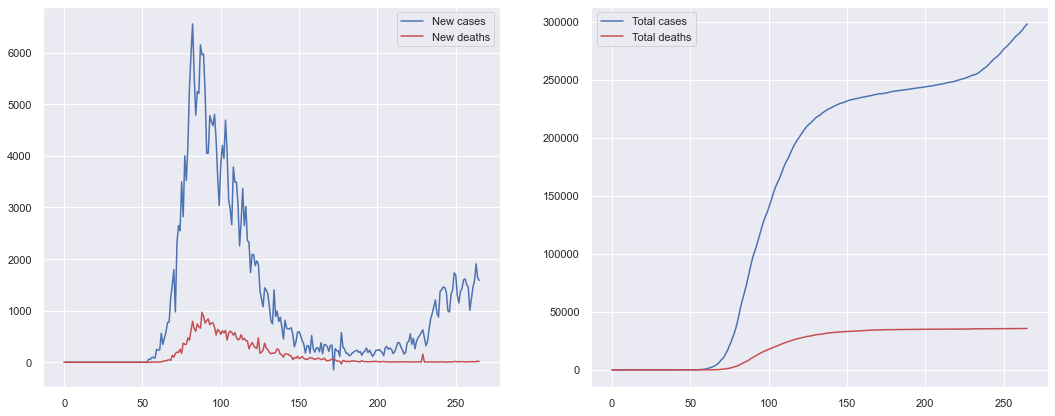

In [95]:
# plotting new deaths and new cases
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,7))
axes[0].plot(data_final['new_cases'], label='New cases')
axes[0].plot(data_final['new_deaths'], label='New deaths', color='r')
axes[0].legend()

axes[1].plot(data_final['total_cases'], label='Total cases')
axes[1].plot(data_final['total_deaths'], label='Total deaths', color='r')
axes[1].legend()
plt.show()

It is clear from the first graph that even though the new cases are increasing again (after day 200), the deaths are still very low.<br><br>
In the second graph we can see that tha total number of cases are again increasing rapidly (after day 200) but the total deaths curve is flattened now indicating decrease in death rate due to covid-19.

# Time series forecasting
## Importing FbProphet

In [40]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


#### Creating a dataframe for new cases.

In [49]:
new_cases_df = data_final[['date','new_cases']]
new_cases_df.columns = ['ds', 'y']

In [50]:
new_cases_df.head()

,ds,y
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0


In [51]:
m = Prophet()
m.fit(new_cases_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
321,2020-11-16
322,2020-11-17
323,2020-11-18
324,2020-11-19
325,2020-11-20


In [99]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
321,2020-11-16,663.108435,-794.852004,2058.329940
322,2020-11-17,479.385133,-949.979403,1917.152447
323,2020-11-18,494.609537,-896.975265,1930.450238
324,2020-11-19,656.850551,-737.533361,2102.722791
325,2020-11-20,754.923946,-766.012563,2026.940348


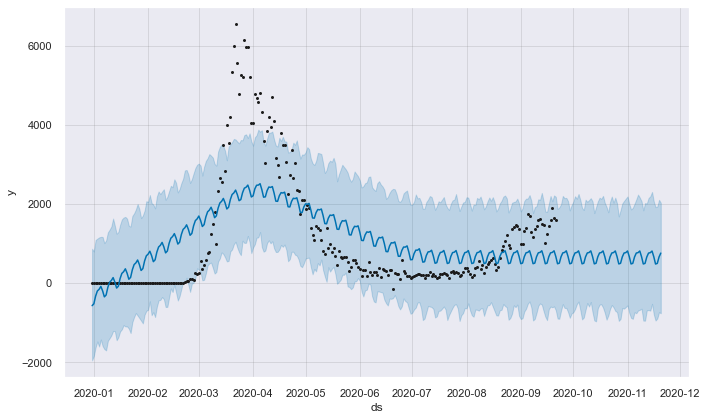

In [100]:
fig1 = m.plot(forecast)

#### Creating a dataframe for new deaths

In [108]:
new_deaths_df = data_final[['date','new_deaths']]
new_deaths_df.columns = ['ds', 'y']

In [109]:
new_deaths_df.tail()

,ds,y
261,2020-09-17,12.0
262,2020-09-18,13.0
263,2020-09-19,10.0
264,2020-09-20,24.0
265,2020-09-21,15.0


In [110]:
m2 = Prophet()
m2.fit(new_deaths_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [111]:
forecast2 = m2.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
321,2020-11-16,-209.973299,-387.790467,-16.967039
322,2020-11-17,-203.524101,-388.613248,-9.432164
323,2020-11-18,-191.872028,-404.586330,-2.991271
324,2020-11-19,-196.987025,-403.263874,-4.046701
325,2020-11-20,-199.513946,-410.988361,8.490980


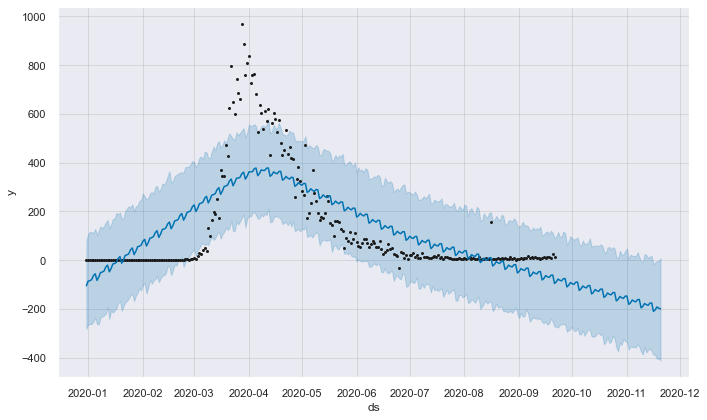

In [112]:
fig1 = m2.plot(forecast2)